Import Libraries

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 

Loading the MNIST dataset and splitting it into training and testing data
Total img = 70,000
Training data = 60,000
Testing data = 10,000 

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

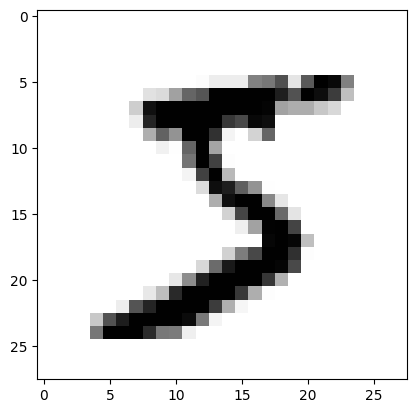

In [3]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [4]:
X_train.shape

(60000, 28, 28)

Normalization of Input Data (Data Preprocessing)

In [5]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

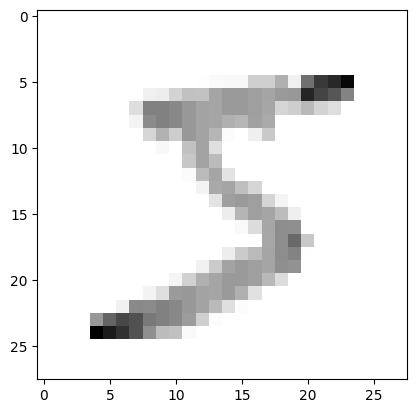

In [6]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [7]:
X_train.shape

(60000, 28, 28)

Data Visualisation

In [8]:
def display_example(examples, labels): 
    plt.figure(figsize= (10,10)) 

    for i in range(25):
        index = np.random.randint(0, examples.shape[0]-1)
        img = examples[index]
        label = labels[index]
        
        plt.subplot(5, 5, i+1)
        plt.title(str(label)) 
        plt.tight_layout() 
        plt.imshow(img, cmap = 'gray')
        
    plt.show()


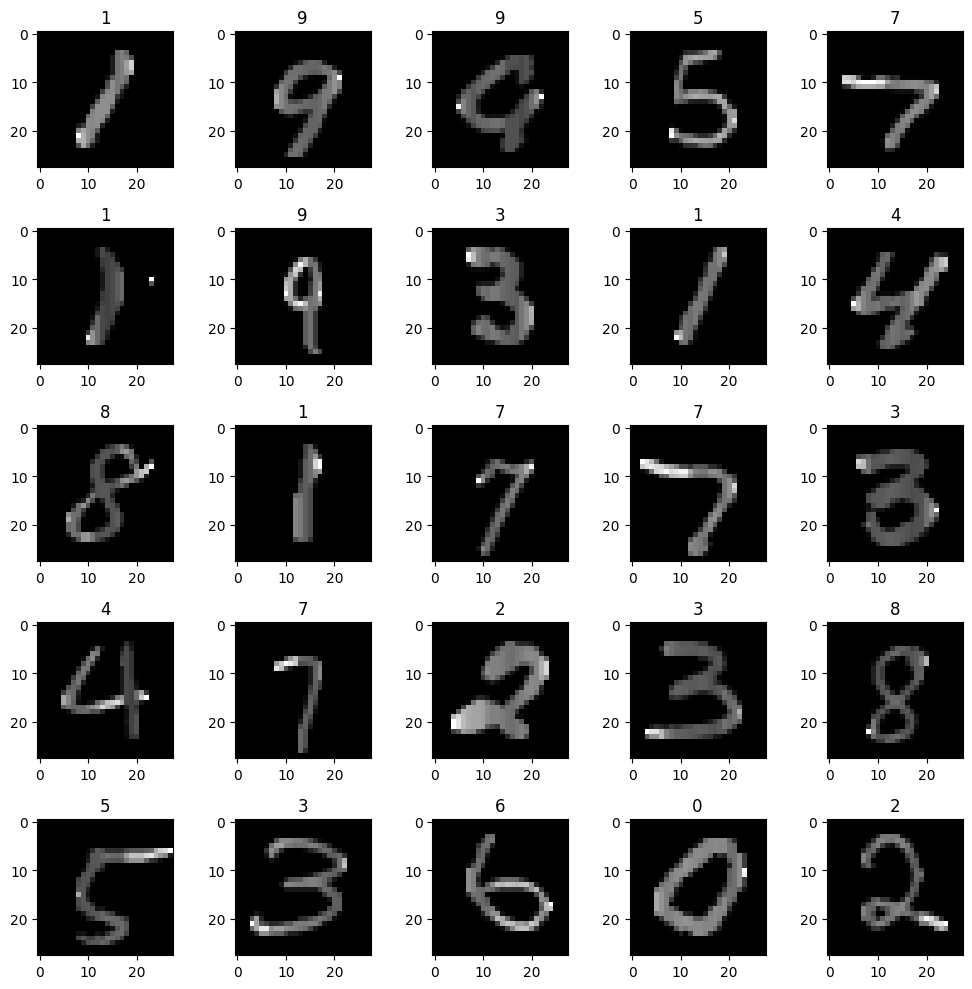

In [9]:
display_example(X_train, y_train)

Resizing the image for convulation

In [10]:
img_size = 28
X_train = np.array(X_train).reshape(-1, img_size, img_size, 1)
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1) #-1 used as one of the dimenssions when the dimension is unknown

print('Training sample dimensions: ', X_train.shape)
print('Testing sample dimensions: ', X_test.shape)

Training sample dimensions:  (60000, 28, 28, 1)
Testing sample dimensions:  (10000, 28, 28, 1)


Importing modules from Tensor flow for model trainig

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

Building the Model

In [12]:
model = Sequential()

#First Convulation layer
model.add(Conv2D(32, (3,3), input_shape = X_train.shape[1:])) #32 = no of filter, 3,3 = kernel size
model.add(Activation ('relu')) #rectified linear unit (remove negative neuron from neural network)
model.add(MaxPooling2D(pool_size=(2,2))) # reduce dimension

#2nd convulation layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

#3rd convulation layer
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

#Fully connected layer
model.add(Dropout(0.25)) # remove 25% of neurons not nedded in the neural network
model.add(Flatten()) #converts the multidimensional dataset in 1D dataset
model.add(Dense(64))
model.add(Activation('relu'))

#fully connected layer 2
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))

#fully connected layer 3
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax')) #softmax computes the probablity, digit with highest probab is output


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

Compile the model

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Training/fitting the model

In [15]:
model.fit(X_train, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 32s 22ms/step - loss: 0.5712 - accuracy: 0.8163 - val_loss: 0.1302 - val_accuracy: 0.9615
Epoch 2/5
1313/1313 [==============================] - 27s 21ms/step - loss: 0.1925 - accuracy: 0.9469 - val_loss: 0.1104 - val_accuracy: 0.9684
Epoch 3/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.1416 - accuracy: 0.9621 - val_loss: 0.0694 - val_accuracy: 0.9794
Epoch 4/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.1096 - accuracy: 0.9703 - val_loss: 0.0692 - val_accuracy: 0.9807
Epoch 5/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0937 - accuracy: 0.9750 - val_loss: 0.0688 - val_accuracy: 0.9821


Testing model

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss: ", test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0575 - accuracy: 0.9833
Test loss:  0.057526569813489914
Test accuracy:  0.983299970626831


Making Predictions

In [17]:
predictions = model.predict([X_test])
print(predictions)

313/313 [==============================] - 2s 6ms/step
[[1.2491973e-11 2.8935641e-09 2.3398577e-06 ... 9.9999738e-01
  8.4282026e-11 1.4132048e-07]
 [9.4533901e-09 6.3506533e-09 9.9999809e-01 ... 1.7814908e-06
  2.7690026e-09 2.2095180e-11]
 [3.0943763e-08 9.9999368e-01 3.7496145e-07 ... 5.0321282e-06
  1.0789254e-07 1.3509667e-08]
 ...
 [4.5871609e-12 9.3397734e-10 3.0560277e-09 ... 3.7619836e-09
  5.7172493e-08 2.3624027e-07]
 [7.6499473e-09 7.0537035e-12 1.1303963e-09 ... 4.7836171e-13
  1.9463937e-06 2.0417824e-06]
 [9.0402858e-07 1.8250769e-10 3.2242005e-07 ... 8.6929155e-14
  7.3033583e-08 1.0358898e-08]]


2


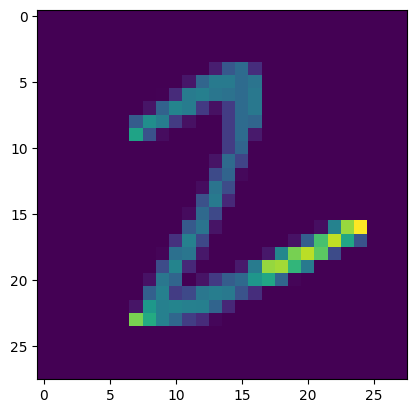

In [18]:
print(np.argmax(predictions[38]))
plt.imshow(X_test[38])

Testing using new data (self-drawn)

In [25]:
import cv2
img = cv2.imread('digits/digit1.png')

In [26]:
img.shape

(28, 28, 3)

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
gray2 = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
gray2.shape

(28, 28)

In [28]:
new_img = tf.keras.utils.normalize(gray2, axis = 1)
new_img = np.array(new_img).reshape(-1, img_size, img_size, 1 )
new_img.shape

(1, 28, 28, 1)

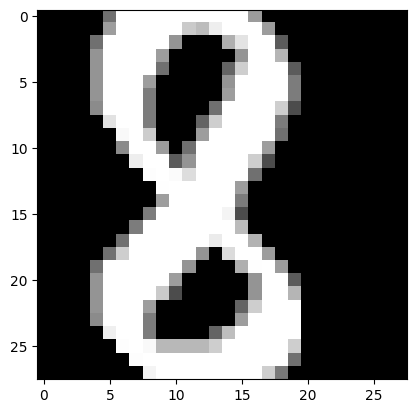

In [29]:
plt.imshow(img)

In [30]:
predictions = model.predict(new_img)
print(np.argmax(predictions))

1/1 [==============================] - 0s 87ms/step
8
